# A Quick Guide to Deep Learning with Python

Kai Zhang, Duke Kunshan University, 2022

# Lecture 5 Keras and TensorFlow Implementation

[Chollet2021] 
https://www.manning.com/books/deep-learning-with-python-second-edition

**enable GPU device** in colab if needed, at Runtime/change runtime type/hardware accelerator

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X_train = train_images.reshape(60000, 28*28).astype(np.float32) / 255
y_train = keras.utils.to_categorical(train_labels, 10)  # convert to one-hot categorical vector
X_test = test_images.reshape(10000, 28*28).astype(np.float32) / 255
y_test = keras.utils.to_categorical(test_labels, 10)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:
print('class label:', train_labels[0], 'one-hot categorical vector:', y_train[0])

class label: 5 one-hot categorical vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 1. Keras API

https://keras.io/about/


https://keras.io/api/models/model_training_apis/

**activation**

* relu
* sigmoid
* softmax

**optimizer**
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

* SGD
* RMSprop
* Adam

**loss**

* mean_square_error, mse
* binary_crossentropy
* categorical_crossentropy 
* sparse_categorical_crossentropy 
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy

**metric**

* accuracy
* mae
* precision
* recall
* AUC

* binary_accuracy https://www.tensorflow.org/api_docs/python/tf/keras/metrics/binary_accuracy
* binary_crossentropy https://www.tensorflow.org/api_docs/python/tf/keras/metrics/binary_crossentropy
* categorical_crossentropy https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_crossentropy
* mean_absolute_error https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_error
* mean_squared_error https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_squared_error
* sparse_categorical_accuracy https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_accuracy
* kl_divergence


## Method 1: keras.Sequential

In [ ]:
model = keras.Sequential([
      layers.Dense(100, activation='sigmoid'),
      layers.Dense(30, activation='sigmoid'),               
      layers.Dense(10, activation='softmax'),                   
]
)

In [ ]:
# or alternatively
model = keras.Sequential()
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(30, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.build(input_shape=(None, 784))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size = 100, validation_data=(X_test,y_test))

Epoch 1/100
600/600 [==============================] - 5s 6ms/step - loss: 0.8413 - accuracy: 0.8143 - val_loss: 0.3409 - val_accuracy: 0.9150
Epoch 2/100
600/600 [==============================] - 4s 6ms/step - loss: 0.2808 - accuracy: 0.9225 - val_loss: 0.2272 - val_accuracy: 0.9355
Epoch 3/100
600/600 [==============================] - 4s 6ms/step - loss: 0.2060 - accuracy: 0.9408 - val_loss: 0.1838 - val_accuracy: 0.9465
Epoch 4/100
600/600 [==============================] - 4s 6ms/step - loss: 0.1661 - accuracy: 0.9517 - val_loss: 0.1577 - val_accuracy: 0.9531
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.1392 - accuracy: 0.9596 - val_loss: 0.1362 - val_accuracy: 0.9608
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.1192 - accuracy: 0.9651 - val_loss: 0.1237 - val_accuracy: 0.9615
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.1040 - accuracy: 0.9699 - val_loss: 0.1136 - val_accuracy: 0.9650

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2050 - accuracy: 0.9761
0.2049899846315384 0.9761000275611877


In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(train_loss)+1)
plt.plot(epochs, train_loss, 'b.-', label='training loss')
plt.plot(epochs, val_loss, 'r-', label='validation loss')
plt.legend()

NameError: ignored

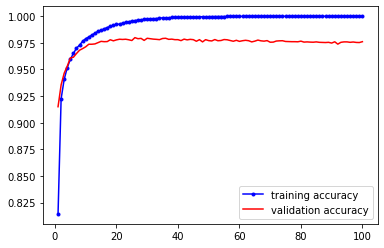

In [ ]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(train_acc)+1)
plt.plot(epochs, train_acc, 'b.-', label='training accuracy')
plt.plot(epochs, val_acc, 'r-', label='validation accuracy')
plt.legend()

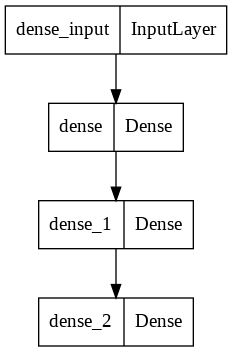

In [ ]:
keras.utils.plot_model(model, 'dense.png')

##  Method 2 keras.Model

In [ ]:
inputs = keras.Input(shape=(28*28))
h1 = layers.Dense(100, activation='sigmoid')(inputs)
h2 = layers.Dense(30, activation='sigmoid')(h1)
outputs =  layers.Dense(10, activation='softmax')(h2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


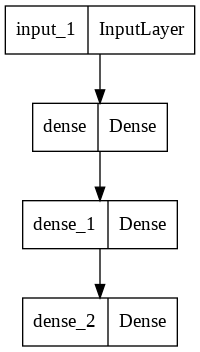

In [ ]:
keras.utils.plot_model(model, 'dense.png')

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, train_labels, epochs=100, batch_size = 100, validation_data=(X_test,test_labels))

Epoch 1/100
600/600 [==============================] - 5s 3ms/step - loss: 0.8033 - accuracy: 0.8216 - val_loss: 0.3333 - val_accuracy: 0.9139
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2755 - accuracy: 0.9237 - val_loss: 0.2318 - val_accuracy: 0.9319
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2049 - accuracy: 0.9408 - val_loss: 0.1861 - val_accuracy: 0.9456
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1665 - accuracy: 0.9511 - val_loss: 0.1544 - val_accuracy: 0.9542
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1396 - accuracy: 0.9595 - val_loss: 0.1383 - val_accuracy: 0.9582
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1198 - accuracy: 0.9651 - val_loss: 0.1244 - val_accuracy: 0.9629
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1038 - accuracy: 0.9699 - val_loss: 0.1128 - val_accuracy: 0.9667

In [ ]:
test_loss, test_acc = model.evaluate(X_test, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 0.2300 - accuracy: 0.9755


# TensorFlow Platform

**tensor**
* scalar (rank 0)
* vector (rank 1)
* matrix (rank 2)
* ...

**computation graph**: declaration and evaluation
* tensorflow 1: static
* tensorflow 2: dynamic

**automatric differentiation**

## tensorflow features

* **constant**: not assignable
```python
tf.zeros()
tf.ones()
tf.random.normal()
tf.random.uniform()
tf.convert_tensor()
```

* **variable**
```python
tf.Variable() # trainable
```

* **operation**
```python
tf.matmul()
tf.add()
```

In [ ]:
import tensorflow as tf

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# tensorflow 1
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [ ]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(3,2))
print(x)

tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [ ]:
x[2,1].assign(1)

AttributeError: ignored

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,2)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.02771   ,  0.47664228],
       [-0.02762689,  0.62898046],
       [ 1.4155625 , -0.19872868]], dtype=float32)>


In [ ]:
v[2,1].assign(1)

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[-0.02771   ,  0.47664228],
       [-0.02762689,  0.62898046],
       [ 1.4155625 ,  1.        ]], dtype=float32)>

In [ ]:
a = tf.ones((2,2))*2.0
b = tf.square(a)
c = a + b
print(a,b,c)
d = tf.matmul(a,b)
print(d)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


## gradient

In [ ]:
weights = tf.Variable(initial_value=[[1.,2.,3.]])
input = tf.constant([[5.],[6.],[7.]])

with tf.GradientTape() as tp:
  loss = tf.matmul(weights, input)
gradient = tp.gradient(loss, weights)

In [ ]:
print(gradient)

tf.Tensor([[5. 6. 7.]], shape=(1, 3), dtype=float32)


In [ ]:
time = tf.Variable(1.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  velocity = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(velocity, time)
print(velocity, acceleration)

tf.Tensor(9.8, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


## Multiclass classifer with tensorflow

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb

The key is to replace all numpy array definitions/calculations with tensorflow.

In [ ]:
# initialize all weights as tensorflow variables

class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation

    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
    self.W = tf.Variable(w_initial_value)

    b_shape = (output_size,)
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property # use property decorator to make a read-only attribute
  def weights(self):
    return [self.W, self.b]


In [ ]:
class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers
  
  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x = layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights


In [ ]:
model = NaiveSequential([
      NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
      NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)                        
])

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels  

In [ ]:
# use tensorflow to calculate the gradient

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights) # automatic symbolic gradient
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)  # w -= eta*g

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
fit(model, X_train, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.68
loss at batch 100: 2.27
loss at batch 200: 2.24
loss at batch 300: 2.07
loss at batch 400: 2.25
Epoch 1
loss at batch 0: 1.90
loss at batch 100: 1.91
loss at batch 200: 1.87
loss at batch 300: 1.69
loss at batch 400: 1.86
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.61
loss at batch 200: 1.54
loss at batch 300: 1.41
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.37
loss at batch 200: 1.27
loss at batch 300: 1.20
loss at batch 400: 1.31
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.18
loss at batch 200: 1.06
loss at batch 300: 1.04
loss at batch 400: 1.14
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.04
loss at batch 200: 0.92
loss at batch 300: 0.92
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.93
loss at batch 200: 0.81
loss at batch 300: 0.83
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.85
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

In [ ]:
predictions = model(X_test)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


In [ ]:
for i in range(len(model.weights)):
  print(model.weights[i].shape)

(784, 512)
(512,)
(512, 10)
(10,)


# Exercise: build a binary classifier of the iris dataset with *tensorflow*